In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from konlpy.tag import Okt
import re

In [3]:
data = pd.read_csv("./review_data/뱅뱅막국수_reviews_추천순_naver.csv")

In [4]:
data

,Index,Date,Review
0,1,2024년 11월 7일 목요일,그 유명한 맛집 뱅뱅막국수 다녀왔습니당 주문하고 바로 뽑아내는 메밀 자가제면이라 면...
1,2,2024년 11월 4일 월요일,도곡동맛집 뱅뱅막국수는 유튜브 먹방에서 보고 찾아갔어요.진짜 점심때 사람이 많아 맛...
2,3,2024년 11월 3일 일요일,처음 방문해봤는데.. 웨이팅이 있을만하네요👍 애매한 시간에 가서 바로 들어갔고\n양...
3,4,2024년 10월 14일 월요일,뱅뱅막국수!\n강남 도곡동 뱅뱅사거리 막국수 맛집!이네요.뱅뱅 돌린 메밀면에 돌돌 ...
4,5,2024년 10월 16일 수요일,강남역 최애 맛집 뱅뱅막국수 다녀왔습니다 🍜✨\n\n오늘 간만에 와이프와 늦은 점심...
...,...,...,...
983,984,2024년 8월 6일 화요일,참기름 막국수랑 육전 조합 최고에요!!\n맛집으로 추천합니다❤️
984,985,2024년 4월 30일 화요일,저녁시간에 가서 웨이팅 있었습니다. 자극적이지 않고 맛있었어요 :)
985,986,2024년 7월 4일 목요일,깔끔하고 단백하고 너무 맛있어요 ^^
986,987,2024년 7월 20일 토요일,양재역 근처 맛집입니다!! 우연히 들어가서 먹었는데 너무 맛있었어요 ㅎㅎ 더운 여름...


In [12]:
data2 = pd.read_csv("./review_data/뱅뱅막국수_reviews_추천순_naver.csv", encoding='utf-8-sig')

In [13]:
# 영어, 숫자, 한글을 제외한 모든 문자와 줄바꿈 제거 함수
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9가-힣\s]', '', text)  # 영어, 숫자, 한글을 제외한 문자 제거
    text = re.sub(r'\n', '', text)  # 줄바꿈 제거
    return text

In [14]:
# 'Review' 컬럼에서 전처리 적용
data2['Review'] = data2['Review'].apply(clean_text)

In [15]:
data2

,Index,Date,Review
0,1,2024년 11월 7일 목요일,그 유명한 맛집 뱅뱅막국수 다녀왔습니당 주문하고 바로 뽑아내는 메밀 자가제면이라 면...
1,2,2024년 11월 4일 월요일,도곡동맛집 뱅뱅막국수는 유튜브 먹방에서 보고 찾아갔어요진짜 점심때 사람이 많아 맛집...
2,3,2024년 11월 3일 일요일,처음 방문해봤는데 웨이팅이 있을만하네요 애매한 시간에 가서 바로 들어갔고양도 진짜 ...
3,4,2024년 10월 14일 월요일,뱅뱅막국수강남 도곡동 뱅뱅사거리 막국수 맛집이네요뱅뱅 돌린 메밀면에 돌돌 말은 예쁜...
4,5,2024년 10월 16일 수요일,강남역 최애 맛집 뱅뱅막국수 다녀왔습니다 오늘 간만에 와이프와 늦은 점심과 낮술이 ...
...,...,...,...
983,984,2024년 8월 6일 화요일,참기름 막국수랑 육전 조합 최고에요맛집으로 추천합니다
984,985,2024년 4월 30일 화요일,저녁시간에 가서 웨이팅 있었습니다 자극적이지 않고 맛있었어요
985,986,2024년 7월 4일 목요일,깔끔하고 단백하고 너무 맛있어요
986,987,2024년 7월 20일 토요일,양재역 근처 맛집입니다 우연히 들어가서 먹었는데 너무 맛있었어요 더운 여름에 시원...


In [16]:
season_data = data2.copy()

In [18]:
season_data

,Index,Date,Review
0,1,2024년 11월 7일 목요일,그 유명한 맛집 뱅뱅막국수 다녀왔습니당 주문하고 바로 뽑아내는 메밀 자가제면이라 면...
1,2,2024년 11월 4일 월요일,도곡동맛집 뱅뱅막국수는 유튜브 먹방에서 보고 찾아갔어요진짜 점심때 사람이 많아 맛집...
2,3,2024년 11월 3일 일요일,처음 방문해봤는데 웨이팅이 있을만하네요 애매한 시간에 가서 바로 들어갔고양도 진짜 ...
3,4,2024년 10월 14일 월요일,뱅뱅막국수강남 도곡동 뱅뱅사거리 막국수 맛집이네요뱅뱅 돌린 메밀면에 돌돌 말은 예쁜...
4,5,2024년 10월 16일 수요일,강남역 최애 맛집 뱅뱅막국수 다녀왔습니다 오늘 간만에 와이프와 늦은 점심과 낮술이 ...
...,...,...,...
983,984,2024년 8월 6일 화요일,참기름 막국수랑 육전 조합 최고에요맛집으로 추천합니다
984,985,2024년 4월 30일 화요일,저녁시간에 가서 웨이팅 있었습니다 자극적이지 않고 맛있었어요
985,986,2024년 7월 4일 목요일,깔끔하고 단백하고 너무 맛있어요
986,987,2024년 7월 20일 토요일,양재역 근처 맛집입니다 우연히 들어가서 먹었는데 너무 맛있었어요 더운 여름에 시원...


In [19]:
season_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Index   988 non-null    int64 
 1   Date    988 non-null    object
 2   Review  988 non-null    object
dtypes: int64(1), object(2)
memory usage: 23.3+ KB


In [21]:
# 날짜 형식 변환: "YYYY년 MM월 DD일" 형식으로 날짜 추출 후 변환
season_data['Date'] = season_data['Date'].str.extract(r'(\d{4}년 \d{1,2}월 \d{1,2}일)')[0]
season_data['Date'] = pd.to_datetime(season_data['Date'], format='%Y년 %m월 %d일', errors='coerce')

# 날짜 변환이 실패한 행 제거
season_data.dropna(subset=['Date'], inplace=True)

# 월(month) 컬럼 생성
season_data['Month'] = season_data['Date'].dt.month

# 계절 분류 함수 정의
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# 계절 컬럼 생성
season_data['Season'] = season_data['Month'].apply(get_season)

In [22]:
season_data

,Index,Date,Review,Month,Season
0,1,2024-11-07,그 유명한 맛집 뱅뱅막국수 다녀왔습니당 주문하고 바로 뽑아내는 메밀 자가제면이라 면...,11,Fall
1,2,2024-11-04,도곡동맛집 뱅뱅막국수는 유튜브 먹방에서 보고 찾아갔어요진짜 점심때 사람이 많아 맛집...,11,Fall
2,3,2024-11-03,처음 방문해봤는데 웨이팅이 있을만하네요 애매한 시간에 가서 바로 들어갔고양도 진짜 ...,11,Fall
3,4,2024-10-14,뱅뱅막국수강남 도곡동 뱅뱅사거리 막국수 맛집이네요뱅뱅 돌린 메밀면에 돌돌 말은 예쁜...,10,Fall
4,5,2024-10-16,강남역 최애 맛집 뱅뱅막국수 다녀왔습니다 오늘 간만에 와이프와 늦은 점심과 낮술이 ...,10,Fall
...,...,...,...,...,...
983,984,2024-08-06,참기름 막국수랑 육전 조합 최고에요맛집으로 추천합니다,8,Summer
984,985,2024-04-30,저녁시간에 가서 웨이팅 있었습니다 자극적이지 않고 맛있었어요,4,Spring
985,986,2024-07-04,깔끔하고 단백하고 너무 맛있어요,7,Summer
986,987,2024-07-20,양재역 근처 맛집입니다 우연히 들어가서 먹었는데 너무 맛있었어요 더운 여름에 시원...,7,Summer


In [23]:
# 계절별 리뷰 수를 세는 코드
season_counts = season_data['Season'].value_counts()

In [24]:
season_counts

Season
Summer    591
Fall      326
Spring     62
Winter      9
Name: count, dtype: int64

In [27]:
season_data[season_data['Season']=='Winter']

,Index,Date,Review,Month,Season
602,603,2024-02-26,샤브샤브와 참기름 막국수 소고기육전 소 사이즈 시켜 먹었습니당 샤브샤브 야채와 고기...,2,Winter
690,691,2024-02-20,소고기 육전과 참기름 막국수 그리고 감태뱅뱅돌려서 감태와 쌈싸먹는 들기름 막국수와 ...,2,Winter
746,747,2024-02-24,집 근처라 늘 포장해서 먹었었는데요들기름 막국수랑 육전이 최애라 시켜먹었었어요얼마전...,2,Winter
781,782,2024-02-20,외식업을 하는 나는 가끔 무리지어 벤치마킹을 향한다 겨울이가고 봄이 얼굴을 내미는 ...,2,Winter
796,797,2024-02-29,2인샤브에 참기름막국수에 미니육전먹었습니다 2인샤브는 고기가 매우적어요 고기추기 필...,2,Winter
860,861,2024-02-20,사장님과 직원분들이 너무 친절하시고 참기름막국수 샤브샤브 메밀전 육전 주문했는데 음...,2,Winter
940,941,2024-02-17,먹어본 막국수 중에 제일 맛나네요 고소한 막국수가 간이 잘되있어서 남녀노소 먹기 좋...,2,Winter
965,966,2024-02-17,지나다니면서 항상 앞에 사람들 바글바글하길래 기대하다가 방문해봤어요 왜 이제야 온거...,2,Winter
973,974,2024-02-25,요즘처럼 날씨가 으시시추울때 뱅뱅막국수에서 손만두등심샤브랑 참기름막국수들기름막국수를...,2,Winter


In [28]:
season_data.to_csv('season_data.csv', index=False, encoding='utf-8-sig')

In [29]:
season_data

,Index,Date,Review,Month,Season
0,1,2024-11-07,그 유명한 맛집 뱅뱅막국수 다녀왔습니당 주문하고 바로 뽑아내는 메밀 자가제면이라 면...,11,Fall
1,2,2024-11-04,도곡동맛집 뱅뱅막국수는 유튜브 먹방에서 보고 찾아갔어요진짜 점심때 사람이 많아 맛집...,11,Fall
2,3,2024-11-03,처음 방문해봤는데 웨이팅이 있을만하네요 애매한 시간에 가서 바로 들어갔고양도 진짜 ...,11,Fall
3,4,2024-10-14,뱅뱅막국수강남 도곡동 뱅뱅사거리 막국수 맛집이네요뱅뱅 돌린 메밀면에 돌돌 말은 예쁜...,10,Fall
4,5,2024-10-16,강남역 최애 맛집 뱅뱅막국수 다녀왔습니다 오늘 간만에 와이프와 늦은 점심과 낮술이 ...,10,Fall
...,...,...,...,...,...
983,984,2024-08-06,참기름 막국수랑 육전 조합 최고에요맛집으로 추천합니다,8,Summer
984,985,2024-04-30,저녁시간에 가서 웨이팅 있었습니다 자극적이지 않고 맛있었어요,4,Spring
985,986,2024-07-04,깔끔하고 단백하고 너무 맛있어요,7,Summer
986,987,2024-07-20,양재역 근처 맛집입니다 우연히 들어가서 먹었는데 너무 맛있었어요 더운 여름에 시원...,7,Summer


In [30]:
import re
from konlpy.tag import Okt

# Okt 형태소 분석기 초기화
okt = Okt()

# 텍스트 전처리 및 품사 태깅 함수 정의
def preprocess_review_with_pos(text):
    # 불필요한 특수문자 제거
    text = re.sub(r"[^가-힣a-zA-Z0-9\s]", "", text)
    # 품사 태깅하여 필요한 품사만 추출
    pos_tags = okt.pos(text, stem=True)  # stem=True로 설정하면 기본형으로 변환
    # 명사(Noun), 동사(Verb), 형용사(Adjective)만 추출
    tokens = [word for word, pos in pos_tags if pos in ['Noun', 'Verb', 'Adjective']]
    return ' '.join(tokens)

# 'Review' 열에 전처리 함수 적용
season_data['Processed_Review'] = season_data['Review'].apply(preprocess_review_with_pos)

# 전처리 결과 확인
print(season_data[['Review', 'Processed_Review']].head())


                                              Review  \
0  그 유명한 맛집 뱅뱅막국수 다녀왔습니당 주문하고 바로 뽑아내는 메밀 자가제면이라 면...   
1  도곡동맛집 뱅뱅막국수는 유튜브 먹방에서 보고 찾아갔어요진짜 점심때 사람이 많아 맛집...   
2  처음 방문해봤는데 웨이팅이 있을만하네요 애매한 시간에 가서 바로 들어갔고양도 진짜 ...   
3  뱅뱅막국수강남 도곡동 뱅뱅사거리 막국수 맛집이네요뱅뱅 돌린 메밀면에 돌돌 말은 예쁜...   
4  강남역 최애 맛집 뱅뱅막국수 다녀왔습니다 오늘 간만에 와이프와 늦은 점심과 낮술이 ...   

                                    Processed_Review  
0  그 유명하다 맛집 뱅뱅 막국수 다녀오다 습 니당다 주문 바로 뽑다 메밀 자가 면 면...  
1  도곡동 맛집 뱅뱅 막국수 유튜브 먹방 보고 찾아가다 진짜 점심때 사람 많다 맛집 인...  
2  처음 방문 해봤다 웨이팅 있다 하다 애매하다 시간 가다 바로 들어가다 양도 진짜 많...  
3  뱅뱅 막국수 강남 도곡동 뱅뱅 사거리 막국수 맛집 뱅뱅 돌리다 메밀 면 말 예쁘다 ...  
4  강남역 최애 맛집 뱅뱅 막국수 다녀오다 오늘 간만 와이프 늦다 점심 낮술 땡기다 좀...  


In [32]:
pip install transformers torch

  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 24.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 64.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.9 MB/s eta 0:00:00
Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl (664.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 65.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 73.3 MB/s eta 0:00:0000:0100:

In [33]:
from transformers import pipeline

# 감정 분석 파이프라인 초기화 (한국어를 지원하는 모델 사용)
sentiment_model = pipeline("sentiment-analysis", model="beomi/kcbert-base")

# 감정 예측 함수 정의
def predict_sentiment(text):
    # 감정 분석 모델로 텍스트 예측
    result = sentiment_model(text)
    return result[0]['label']  # 예측된 감정 레이블 반환

# 리뷰 데이터에 감정 예측 적용
season_data['Sentiment'] = season_data['Processed_Review'].apply(predict_sentiment)

# 결과 확인
print(review_data[['Review', 'Processed_Review', 'Sentiment']].head())


/home/user/miniforge3/envs/nlp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-11-11 15:53:21.746677: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/user/miniforge3/envs/nlp/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/user/miniforge3/envs/nlp/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/user/miniforge3/envs/nlp/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/user/miniforge3/envs/nlp/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_in

AttributeError: _ARRAY_API not found

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

RuntimeError: Failed to import transformers.pipelines because of the following error (look up to see its traceback):
Unable to convert function return value to a Python type! The signature was
	() -> handle

In [34]:
import torch
from kobert_tokenizer import KoBERTTokenizer
from transformers import BertModel
import pandas as pd

# KoBERT 모델과 토크나이저 로드
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
model = BertModel.from_pretrained('skt/kobert-base-v1')

# 데이터프레임 로드 (예시)
# review_data = pd.read_csv("path_to_your_file.csv")

# KoBERT를 사용한 감정 예측 함수 정의
def predict_sentiment_kobert(text):
    # 텍스트 토큰화
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    # 모델 예측 수행
    outputs = model(**inputs)
    # [CLS] 토큰의 출력 값만 사용
    cls_output = outputs.last_hidden_state[:, 0, :]
    # (여기에서는 단순히 벡터를 반환하지만, 감정 분류를 위해 추가 분석 가능)
    return cls_output.mean().item()  # 간단히 평균을 반환 (추후 감정 예측 모델로 활용)

# 리뷰 데이터에 감정 예측 적용
review_data['Sentiment_Score'] = review_data['Processed_Review'].apply(predict_sentiment_kobert)

# 결과 확인
print(review_data[['Review', 'Processed_Review', 'Sentiment_Score']].head())


ModuleNotFoundError: No module named 'kobert_tokenizer'

In [36]:
pip install torch


Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install gluonnlp

  Preparing metadata (setup.py) ... done
  Using cached Cython-3.0.11-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.2 kB)
Using cached Cython-3.0.11-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp310-cp310-linux_x86_64.whl size=470020 sha256=160d7de86b829136bec745e87e2c986e631c11d674c7c5c10f7c80ea120a0a0f
  Stored in directory: /home/user/.cache/pip/wheels/1a/1e/0d/99f55911d90f2b95b9f7c176d5813ef3622894a4b30fde6bd3
Successfully built gluonnlp
Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install mxnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 27.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 67.6 MB/s eta 0:00:00:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.0
    Uninstalling numpy-2.1.0:
      Successfully uninstalled numpy-2.1.0
Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-47abi984
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-47abi984
  Resolved https://****@github.com/SKTBrain/KoBERT.git to commit 5c46b1c68e4755b54879431bd302db621f4d2f47
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of kobert to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement onnxruntime<=1.8.0,==1.8.0 (from kobert) (from versions: 1.12.0, 1.12.1, 1.13.1, 1.14.0, 1.14.1, 1.15.0, 1.15.1, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.17.0, 1.17.1, 1.17.3, 1.18.0, 1.18.1, 1.19.0, 1.19.2, 1.20.0)
ERROR: No matching distribution found for onnxruntime<=1.8.0,==1.8.0
Note: you may need to restart the kernel to use updated packages.


In [42]:
import torch
from transformers import BertModel
from kobert import get_pytorch_kobert_model
from kobert_tokenizer import KoBERTTokenizer
import pandas as pd

# KoBERT 모델과 토크나이저 로드
bertmodel, vocab = get_pytorch_kobert_model()
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')

# 예시 데이터프레임 로드 (예시)
# review_data = pd.read_csv("path_to_your_file.csv")

# KoBERT를 사용한 감정 예측 함수 정의
def predict_sentiment_kobert(text):
    # 텍스트 토큰화
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    # 모델 예측 수행
    outputs = bertmodel(**inputs)
    # [CLS] 토큰의 출력 값만 사용
    cls_output = outputs.last_hidden_state[:, 0, :]
    return cls_output.mean().item()  # 간단히 평균을 반환 (추후 감정 예측 모델로 활용)

# 리뷰 데이터에 감정 예측 적용
season_data['Sentiment_Score'] = season_data['Processed_Review'].apply(predict_sentiment_kobert)

# 결과 확인
print(season_data[['Review', 'Processed_Review', 'Sentiment_Score']].head())


RuntimeError: Failed to import transformers.models.bert.modeling_bert because of the following error (look up to see its traceback):
Unable to convert function return value to a Python type! The signature was
	() -> handle

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from konlpy.tag import Okt


In [44]:
reviews_df = pd.read_csv("./season_data.csv")

In [53]:
reviews_df

,Index,Date,Review,Month,Season,감성
0,1,2024-11-07,그 유명한 맛집 뱅뱅막국수 다녀왔습니당 주문하고 바로 뽑아내는 메밀 자가제면이라 면...,11,Fall,긍정
1,2,2024-11-04,도곡동맛집 뱅뱅막국수는 유튜브 먹방에서 보고 찾아갔어요진짜 점심때 사람이 많아 맛집...,11,Fall,긍정
2,3,2024-11-03,처음 방문해봤는데 웨이팅이 있을만하네요 애매한 시간에 가서 바로 들어갔고양도 진짜 ...,11,Fall,중립
3,4,2024-10-14,뱅뱅막국수강남 도곡동 뱅뱅사거리 막국수 맛집이네요뱅뱅 돌린 메밀면에 돌돌 말은 예쁜...,10,Fall,긍정
4,5,2024-10-16,강남역 최애 맛집 뱅뱅막국수 다녀왔습니다 오늘 간만에 와이프와 늦은 점심과 낮술이 ...,10,Fall,긍정
...,...,...,...,...,...,...
983,984,2024-08-06,참기름 막국수랑 육전 조합 최고에요맛집으로 추천합니다,8,Summer,긍정
984,985,2024-04-30,저녁시간에 가서 웨이팅 있었습니다 자극적이지 않고 맛있었어요,4,Spring,중립
985,986,2024-07-04,깔끔하고 단백하고 너무 맛있어요,7,Summer,중립
986,987,2024-07-20,양재역 근처 맛집입니다 우연히 들어가서 먹었는데 너무 맛있었어요 더운 여름에 시원...,7,Summer,긍정


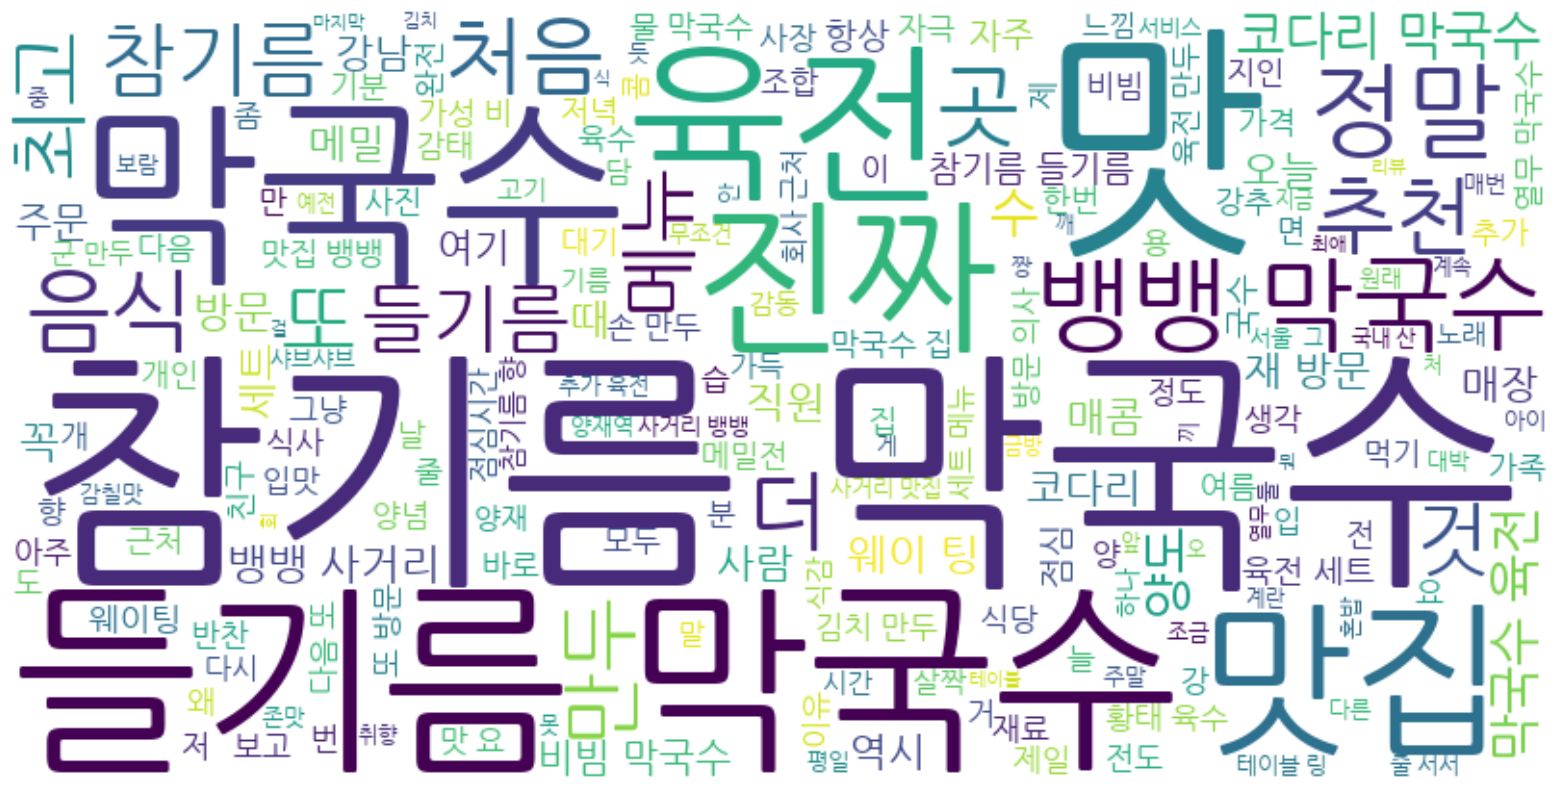

In [54]:
# 텍스트 데이터 전처리
text_data = ' '.join(review for review in reviews_df['Review'].astype(str))

# 형태소 분석기 (Okt) 사용하여 명사 추출
okt = Okt()
nouns = okt.nouns(text_data)
nouns_text = ' '.join(nouns)

# WordCloud 생성
wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # 한글 폰트 경로 (윈도우 기준)
    width=800,
    height=400,
    background_color='white'
).generate(nouns_text)

# WordCloud 시각화
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [46]:
from nltk import FreqDist

In [47]:
from matplotlib import font_manager, rc

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'  # 'NanumGothic'이 설치된 경우
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

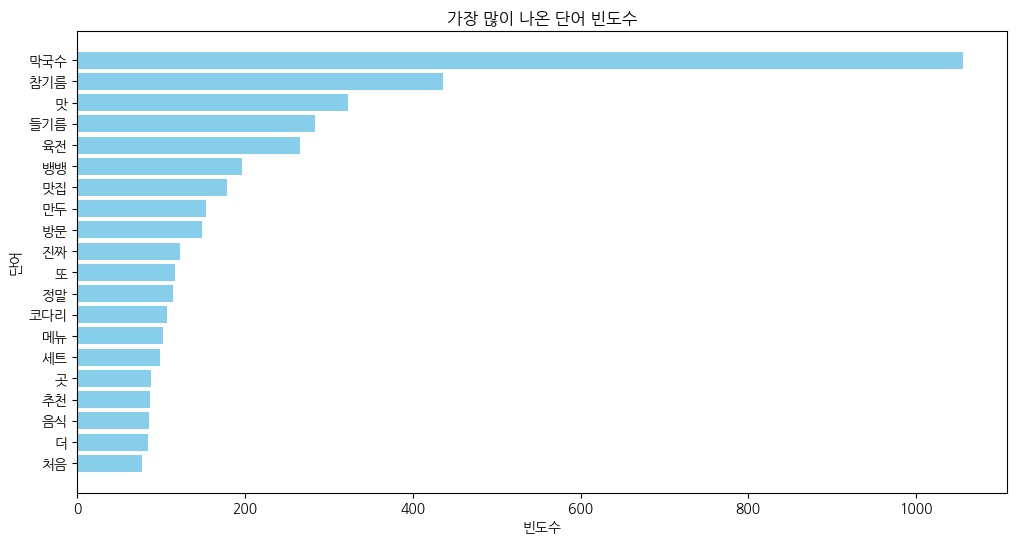

In [48]:
# 텍스트 데이터 전처리
text_data = ' '.join(review for review in reviews_df['Review'].astype(str))

# 형태소 분석기 (Okt) 사용하여 명사 추출
okt = Okt()
nouns = okt.nouns(text_data)

# 단어 빈도수 계산
word_freq = FreqDist(nouns)

# 가장 많이 나온 상위 20개 단어 선택
top_words = word_freq.most_common(20)

# 단어와 빈도수를 분리
words = [word for word, freq in top_words]
frequencies = [freq for word, freq in top_words]

# 막대그래프 생성
plt.figure(figsize=(12, 6))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('빈도수')
plt.ylabel('단어')
plt.title('가장 많이 나온 단어 빈도수')
plt.gca().invert_yaxis()  # 빈도수가 높은 단어가 위로 오도록 설정
plt.show()

In [49]:
from collections import Counter

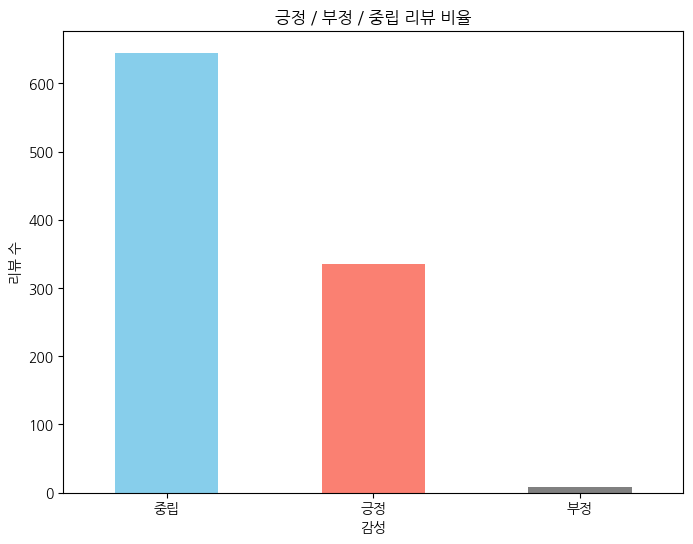

In [51]:
# 감성 사전 로드
# 간단한 긍정/부정 단어 리스트를 정의 (한국어 감성 사전을 사용하는 것이 이상적)
positive_words =  [
"좋", "훌륭", "최고", "맛있", "추천", "즐겁", "기쁘", "만족", "감동", "깨끗", "재밌", "친절",
"감사", "좋아하", "편안", "행복", "깔끔", "존맛", "JMT", "맛집", "짱", "베스트", "대박",
"최애", "힐링", "감탄", "인생", "역대급", "완벽", "신선", "든든", "엄지 척", "배려", "뿌듯",
"포근", "추천템", "안심", "만족도 최고", "편리", "세련", "유용", "아늑", "기대 이상", "고급지다",
"센스있", "특별", "화려", "러블리", "맛보장", "행운", "예쁘다", "베리 굿", "가성비 좋", "적극 추천",
"감성적", "취향저격", "레전드", "완소", "쏘 스윗", "찐행복", "갓성비", "귀엽", "최애템", "핵꿀잼",
"고급미", "갓벽", "미쳤다", "오져", "대만족", "찐사랑", "신박", "고퀄", "강추", "존좋", "너무 좋",
"죽인다", "굿굿", "금손", "소확행", "최상급", "훈훈", "신세계", "고급짐", "재구매 의사", "초강추",
"귀엽고 예쁨", "찐템", "꿀템", "신박하다", "행복함", "안심됨", "극호", "꾸안꾸", "손맛 좋",
"핵감동", "친근감", "든든함", "사랑스러움", "행복사", "찐최애", "만점템", "찐인생템", "눈호강",
"청정구역", "맑고 깨끗", "깨알재미", "귀염", "사랑스럽다", "가성비템", "깔쌈", "베리굿", "딱 좋음",
"잘 나감", "편의성 굿", "안정적", "배부름", "센스 만점", "짱짱맨", "적극적", "말해 뭐해", "넘사벽",
"신뢰감", "꿀잼보장", "심쿵", "센스 넘침", "재미짐", "편리함", "만족스러움", "무한 감동", "탄탄함",
"우수함", "굿", "존맛탱구리", "ㄴㅇㅅ", "내돈내산", "또방문", "재방문 의사 있", "유명", "소문낼",
"유명한 이유가 있", "돈 값을 하는", "충족", "ㄱㅇㄷ", "개이득", "최상", "킹왕짱", "행복함",
"맛집 인정", "찐맛", "호불호 없음", "득템각", "부담없", "소장각", "갓템", "마음에 쏙", "신뢰성",
"마음에 든다", "완소템", "힐링템", "푹신함", "대존맛", "신의 한 수", "필수템", "사길 잘함", "극찬",
"알차다", "취향존중", "무조건 추천", "잘 샀다", "고급", "실속 있음", "잘 맞음", "너무 예쁘다",
"믿고 구매", "다시 살듯", "감성템", "꾸준히 씀", "만족감", "깔끔한 마감", "사길 잘했다", "쓸모있음",
"완벽템", "실용적", "매력있음", "비교불가", "퀄리티 갑", "최상의 선택", "역시 좋다", "손이 가요",
"가치 있음", "핫플", "핵추천", "혜자템", "품질보장", "국민템", "끝내줌", "강력 추천", "금방 동남",
"엄지척", "거의 완벽", "찬사받음", "인기템", "너무 예쁨", "감동적", "눈이 즐거움", "존예", "핫템",
"정말 좋아요", "불만 없음", "깔끔한 마무리", "퀄리티 짱", "세상 최고", "매력적", "끝내줌", "눈물남",
"현존 최고", "좋은 선택", "짱짱", "상상초월", "미친 가성비", "저렴한데 좋음", "찐", "돈 값함",
"인정", "핵만족", "보장된 품질", "칭찬할 만함", "행운템", "아기자기함", "다시 가고 싶음",
"핵감사", "짱짱짱", "여긴 진짜다"
]
negative_words =  [
"나쁘", "별로", "싫", "최악", "불편", "문제", "실망", "불만", "안좋", "안되", "부족", "힘들",
"비싸", "짜증", "불친절", "후회", "아쉽", "형편없", "엉망", "답답", "지루", "불쾌", "피곤",
"귀찮", "못하", "어렵", "복잡", "짜증나", "실수", "기대 이하", "아깝", "화나", "무례", "미흡",
"고통", "시끄럽", "안타깝", "낡", "지저분", "아프", "헛걸음", "속상", "똥손", "후지", "망",
"버거움", "별로임", "바가지", "낙후", "불량", "헛돈", "극혐", "잦은 오류", "대충", "불쾌한 경험",
"비추", "별로네", "허접", "노답", "구려", "폐급", "구리다", "짜증 폭발", "돈낭비", "헬", "멘붕",
"분노", "허접하다", "불편함", "답답함", "현타", "먹튀", "짜증남", "신경쓰임", "헛돈", "개노답",
"한심", "쌩돈", "쓰레기", "이딴", "어설프다", "오류 많음", "형편없음", "허무함", "낭비", "아쉬움",
"개판", "헬게이트", "어이없음", "대실망", "구림", "후회막급", "서비스 엉망", "좌절", "불편하다",
"무리수", "취소각", "짜증만땅", "불만족", "더럽다", "화가남", "찝찝", "바가지", "속터짐", "별로다",
"실망스러움", "별로에요", "스트레스", "무책임", "노잼", "먹금", "못난", "오바임", "과대광고",
"구라", "실망임", "불만족스럽", "개노답", "망했", "못하겠", "허접쓰", "오지랖", "지저분함",
"헛소리", "오류투성이", "피곤함", "서비스 엉망진창", "예민함", "낙제점", "답없다", "과함", "잔소리",
"번거로움", "불완전", "뻘짓", "정떨어짐", "영혼 없음", "허술함", "제자리", "정리안됨", "답이 없음",
"빈약함", "불친절한 응대", "뻔뻔", "낙후됨", "어이상실", "시간낭비", "멀미", "부실함", "막장임",
"헛고생", "최악의 경험", "실망감", "엉망진창", "걱정됨", "재방문 의사 없", "개노맛", "실망각",
"차라리 안 샀음", "먹다 버림", "재구매 없음", "헛돈 날림", "버림", "답답함", "후회함", "개망",
"터무니없", "형편 없음", "망템", "퀄리티 떨어짐", "돈 아까움", "상태 불량", "비효율적", "쓸모없음",
"버림", "품질 저하", "오바스러움", "가성비 별로", "마음에 안 듦", "손해", "완전 별로", "무의미",
"효율성 없음", "가치 없음", "엉성함", "재방문 안함", "비추함", "믿고 걸러", "두 번 다시", "안 맞음",
"어이없다", "구매 비추천", "완전 구림", "불량품", "기대와 다름", "불쾌감", "미스", "절대 비추",
"낭비된 돈", "비추요", "이 돈값 못함", "바로 반품", "싼 게 비지떡", "텅텅", "돈값 못함", "손해봤다",
"별로였음", "너무 별로", "비추템", "핵노잼", "돈 아까움", "실망", "안간다", "차라리 딴데", "속았음",
"후회만 남음", "맘 상함", "믿거템", "한 번 가고 안 감", "사기템", "버림", "쓰레기템", "더러움",
"터무니 없음", "낚임", "두 번은 안 감", "쓰레기 서비스", "불안함", "서비스 미숙", "당황스러움",
"너무 느림", "후회만 가득", "갈 이유 없음", "마음 상함", "말도 안 됨", "너무 허접", "없어서 못감",
"체감상 별로", "기분 상함", "하자 많음", "최악의 결정", "구매 후회", "안습", "저렴한 티", "헛된 시간",
"망함", "지저분", "두 번 안 감", "손해봄", "싼 맛에 샀는데 후회", "기대보다 별로", "차라리 안 사는 게",
"기분 상함", "아무것도 아님", "안 사는 게 나음", "갓성비 아님", "여기만 빼고 다 좋음", "진절머리",
"진저리", "별로다 못해 최악", "위생이 별로"
]

# 형태소 분석기 (Okt) 초기화
okt = Okt()

# 리뷰에 대한 감성 점수 계산 함수
def sentiment_score(text):
    tokens = okt.morphs(text)  # 형태소 추출
    pos_count = sum(1 for word in tokens if word in positive_words)
    neg_count = sum(1 for word in tokens if word in negative_words)
    if pos_count > neg_count:
        return "긍정"
    elif neg_count > pos_count:
        return "부정"
    else:
        return "중립"

# NaN 값을 빈 문자열로 대체
reviews_df['Review'] = reviews_df['Review'].fillna('')
# 감성 점수 계산
reviews_df['감성'] = reviews_df['Review'].apply(sentiment_score)

# 감성 분석 결과 개수 카운트
sentiment_counts = reviews_df['감성'].value_counts()

# 시각화
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'gray'])
plt.title('긍정 / 부정 / 중립 리뷰 비율')
plt.xlabel('감성')
plt.ylabel('리뷰 수')
plt.xticks(rotation=0)
plt.show()

In [52]:
# 각 감성별 리뷰 예시를 추출
num_samples = 3  # 감성별로 출력할 리뷰 수 설정

# 중립 리뷰 예시
neutral_reviews = reviews_df[reviews_df['감성'] == '중립']['Review'].head(num_samples)
print("중립 리뷰 예시:")
print(neutral_reviews)

# 긍정 리뷰 예시
positive_reviews = reviews_df[reviews_df['감성'] == '긍정']['Review'].head(num_samples)
print("\n긍정 리뷰 예시:")
print(positive_reviews)

# 부정 리뷰 예시
negative_reviews = reviews_df[reviews_df['감성'] == '부정']['Review'].head(num_samples)
print("\n부정 리뷰 예시:")
print(negative_reviews)


중립 리뷰 예시:
2     처음 방문해봤는데 웨이팅이 있을만하네요 애매한 시간에 가서 바로 들어갔고양도 진짜 ...
5     막국수집인만큼 들기름막국수참기름막국수 정말 맛있어요참기름막국수에 곤드레랑 궁채를 넣...
11    참기름막국수가 엄청 맛있었네요 볶음메밀이 별사탕처럼 씹히는 식감이 신기하면서 고소했...
Name: Review, dtype: object

긍정 리뷰 예시:
0    그 유명한 맛집 뱅뱅막국수 다녀왔습니당 주문하고 바로 뽑아내는 메밀 자가제면이라 면...
1    도곡동맛집 뱅뱅막국수는 유튜브 먹방에서 보고 찾아갔어요진짜 점심때 사람이 많아 맛집...
3    뱅뱅막국수강남 도곡동 뱅뱅사거리 막국수 맛집이네요뱅뱅 돌린 메밀면에 돌돌 말은 예쁜...
Name: Review, dtype: object

부정 리뷰 예시:
110    자가제면 뱅뱅 막국수 유명한 만큼 맛도 최고들기름 막국수는 감태에 싸먹으먼 별미육전...
242            막국수 별로 안좋아하는데 너무 맛있음 면발이 기가 막힘줄 선 보람이 있네요
402    너무 맛있게 먹었어요참기름 막국수 저번에 너무 맛있게 먹었는데 오늘은 코다리 막국수...
Name: Review, dtype: object
